In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib


In [ ]:

# Step 2: Load the Dataset
# Ensure the dataset file 'data.csv' is in the same directory as this script
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_


Dataset Shape: (569, 33)

Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst            

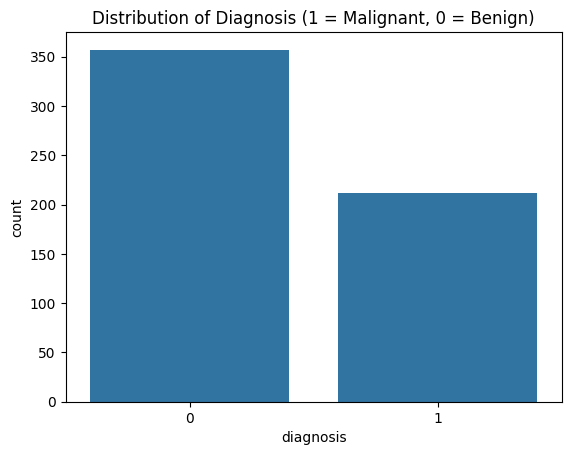

In [ ]:
# Step 3: Explore the Dataset
# Check the shape of the dataset
print("\nDataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop unnecessary columns (e.g., 'Unnamed: 32' and 'id')
df.drop(columns=['Unnamed: 32', 'id'], inplace=True, errors='ignore')

# Convert diagnosis to binary (Malignant = 1, Benign = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Visualize the distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.title("Distribution of Diagnosis (1 = Malignant, 0 = Benign)")
plt.show()

In [ ]:
# Step 4: Prepare the Data
# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Train the Model
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)


Model Accuracy: 0.96


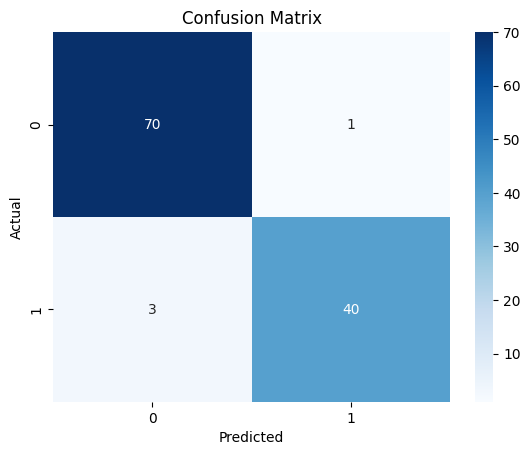


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
#Step 6: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) # Changed 'accur' to 'accuracy_score'
# acy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

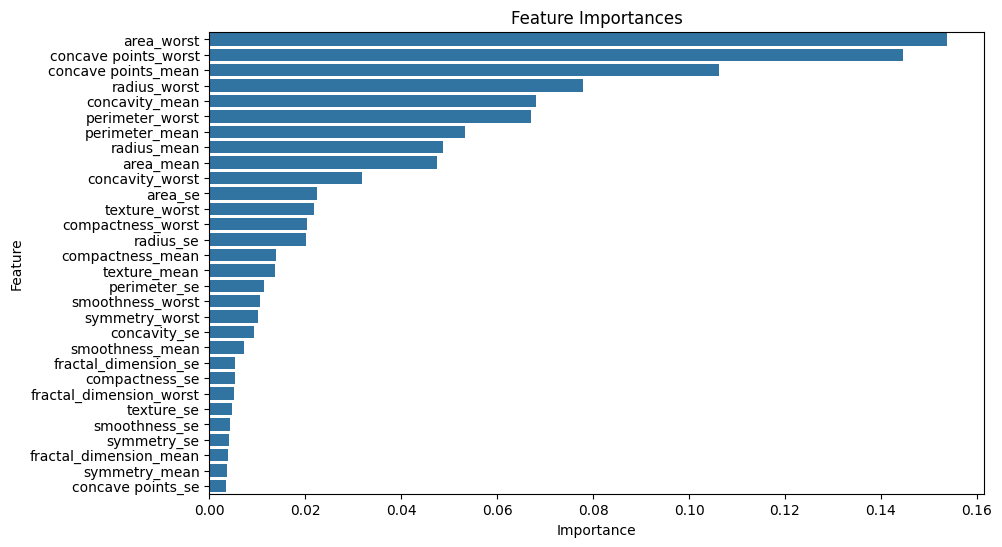

In [ ]:
#step 7: Feature Importance
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.show()

In [ ]:
# Step 8: Save the Model (Optional)
# Save the trained model
joblib.dump(model, 'breast_cancer_model.pkl')

['breast_cancer_model.pkl']

In [25]:
# Step 9: Take User Input and Predict

def get_user_input():
    # Collect input from the user for all the features in the dataset (except 'diagnosis')
    print("\nEnter the following features for prediction:")
    input_data = []
    feature_columns = X.columns.tolist()  # List of features used for prediction

    # Iterate over each feature and get user input
    for feature in feature_columns:
        while True:
            try:
                value = float(input(f"{feature}: "))  # Convert to float
                input_data.append(value)
                break
            except ValueError:
                print("Please enter a valid number.")

    # Convert the input data to a numpy array and scale it
    input_data = np.array(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)  # Use the same scaler for input scaling

    # Predict using the trained model
    prediction = model.predict(input_data_scaled)
    return prediction[0]

# Ask the user for input and predict the result
predicted_class = get_user_input()

if predicted_class == 1:
    print("\nPrediction: Malignant (1)")
else:
    print("\nPrediction: Benign (0)")


Enter the following features for prediction:
radius_mean: 1
texture_mean: 1
perimeter_mean: 1
area_mean: 
Please enter a valid number.
area_mean: 1
smoothness_mean: 1
compactness_mean: 1
concavity_mean: 1
concave points_mean: 1
symmetry_mean: 1
fractal_dimension_mean: 1
radius_se: 1
texture_se: 1
perimeter_se: 1
area_se: 
Please enter a valid number.
area_se: 1
smoothness_se: 1
compactness_se: 1
concavity_se: 1
concave points_se: 1
symmetry_se: 1
fractal_dimension_se: 1
radius_worst: 1
texture_worst: 1
perimeter_worst: 1
area_worst: 1
smoothness_worst: 1
compactness_worst: 
Please enter a valid number.
compactness_worst: 1
concavity_worst: 1
concave points_worst: 1
symmetry_worst: 1
fractal_dimension_worst: 1

Prediction: Benign (0)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
